# Gradient Descent

I wrote this code as part of my Advanced Data Science Methods course that I took at the University of Washington.

This Notebook illustrates how the gradient descent algorithm works for matrices of different dimensions. Let's say we want to set up gradient descent for $f(x) = x^{2}$, and our learning rate R is 0.1. The correct location of the maximum of this function is: (0,0), which we can show by taking the derivative of the function and setting it equal to 0:

The minimum is when $f'(x)=0$

This occurs when $f'(x) = ((x^{2}))' = 2x = 0$, or $x = 0, y = 0$

Since the function vector is $(x,x^{2})$, the gradient vector of the function is: $(1 , 2x)$, which has dimension of 2x1. If we pick a point that is not the minimum, say $x_{0} = (1, 1)$, we can show that we step closer to the minimum after one gradient descent step.

The gradient at $x$ is &#9661;$f(x) = f'(x, y) = f'(x, x^2) = (1, 2x)$

Thus, $f'(x_0) = f(1, 2x) = (1, 2)$. We can then update the new value $x_1$ by subtracting the derivative multiplied by the learning rate from the initial point:

$x_{1}$ = $x_{0}$ - R * &#9661;f$(x_{0})$ = $(0.9, 0.8)$

We did indeed move closer to the minimum. The following steps will show how we can implement this in code for the 1D and 2D cases.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#function defines f(x) = -x**2
#takes in an integer value and returns an array containing (x, f(x))
def define_function(x):
    return np.array([x, (x**2)])

#function defines the gradient vector for a given point on f(x) = x**2
def grad(function):
    return np.array([1, 2*function[1]])

#should output (1, 2) like the above example
print(grad(define_function(1)))

[1 2]


In [3]:
#this funciton takes in a a value, and creates a point array of the form (x, f(x)) where f(x) = x**2
#it then computes the gradient vector, and uses it to compute the new x1 vector using x1 = x0 + alpha*g(x0)
#alpha is the learning rate
def nextGradPoint(x, alpha):
    #define first point
    x0 = np.array([x, (x**2)])
    
    #calculate the gradient
    gradient = np.array([1, 2*x0[1]])
    
    #take a step towards the minimum
    x1 = x0 - alpha*gradient
    
    return x1

In [4]:
x1 = nextGradPoint(1, 0.1)

#should be (0.9, 0.8) like the example above
print(x1)

[0.9 0.8]


**Some notes on gradient descent, and choosing a learning rate:**

In testing out other values for starting point, it seems starting point $x_0$ is directly proportional to the number of iterations it takes to find the maximum of our function. A higher value of |x| means more iterations and vice versa.

A large learning rate $\alpha$ may never converge. It may oscillate between values, overshooting our minimum value. In contrast, with a very small learning rate, our overall trend will be towards convergence, but it may be too slow and give the wrong answer for our minimum value for a limited number of iterations.

# Implement the 2D Version

If A is a symmetric matrix, then $a_{12} = a_{22}$. So if we multipy $Ax$, we get a 2x1 vector: <br>
>|$x_{1}a_{11} + x_{2}a_{12}$|<br>
>|$x_{1}a_{12} + x_{2}a_{22}$| <br>

Then if we take $x^{T}Ax$, we get a 1x1 vector: <br>
>$(x_{1}^{2}a_{11} +2x_{1}x_{2}a_{12} + x_{2}^{2}a_{22})$<br>

This shows that $x^{T}Ax$ is quadratic. This is important, because we can always find a minimum (even if not the true minimum) using the gradient descent algorithm on a convex function.

Let's define the gradient of our symmetric matrix, $f(x) = 2Ax$<br>

$f(x) = (x_{1}^{2}a_{11} +2x_{1}x_{2}a_{12} + x_{2}^{2}a_{22})$<br>

&#9661;$f(x) = (f_{x_{1}}, f_{x_{2}})^{T}$ =  $((2x_{1}a_{11} + 2x_{2}a_{12}), (2x_{1}a_{12} + 2x_{2}a_{22}))^{T}$ = $2Ax$

If our matrix is $A = (1 2; 2 8)$ and $x = (2; -3)$, then $2Ax$ is: <br>

$= 2((2*1 - 3*2), (2*2 - 3*8))^{T}$<br>

$= 2((2-6), (4-24))^{T}$<br>

$= 2(-4, -20)^{T}$<br>

$= (-8, -40)^{T}$<br>

In [5]:
#algorithm to compute gradient of our symmetric matrix, grad(f(x)) = 2Ax
def gradient(A, x):
    return 2*A@x

#create A and x arrays
A = np.matrix('1 2; 2 8')
x = np.matrix('2; -3')

#output example above
example = gradient(A, x)

print(example)
#we get the right answer!

[[ -8]
 [-40]]


In [6]:
"""
Given a matrix A with a starting point x and learning rate alpha,
and for a given number of iterations R with some amount of allowed error E,
find the minimum of a function prescribed by the matrix A.
"""
def gradient_descent(A, x, alpha, R, E, z1, z2):
    iterations = 0
    
    g = 2*A@x
    x1 = x - alpha*g
    
    z1.append(x1[0])
    z2.append(x1[1])
    
    x = x1
    iterations = iterations + 1
    
    while (iterations <= R and np.abs(x1[1]) > 0 + E):
        g = 2*A@x
        x1 = x - alpha*g
        
        z1.append(np.array(x1[0]).flatten())
        z2.append(np.array(x1[1]).flatten())
        
        x = x1
        iterations = iterations + 1

    print('\niterations: ', iterations)
    print('solution: ', x.flatten())

In [7]:
#create A and x matrices
A = np.array([[1, 2], [2, 8]])
x = np.array([[2], [-3]])

#lists for saving x and y values to
x_ = []
y_ = []

#run the gradient descent function
gradient_descent(A, x, 0.1, 150, 10**-6, x_, y_)

#change lists to arrays
x_ = np.array(x_)
y_ = np.array(y_)


iterations:  137
solution:  [ 3.61773243e-06 -9.60741075e-07]


So after 137 of our 150 iterations, we are 'close enough' to the minimum value that we exited due to our early stopping criterion.

In [8]:
#number of samples in our linspace()
n = 30

x1 = np.linspace(-4, 6, num=n)
x2 = np.linspace(-3, 1, num=n)

#create a grid of x1, x2 values
grid1, grid2 = np.meshgrid(x1, x2)

## fill the grid via looping
x_y = np.concatenate([x_, y_], axis = 1)

#create empty grid to fill values
z = np.empty_like(grid1)

#loop over empty grid
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        x = np.array([grid1[i,j], grid2[i,j]])
        
        #replace f(x) with function values
        z[i,j] = x.T @ A @ x
    
#create levels for plotting
levels = [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50]

In [9]:
"""
Plot the path of the gradient descent steps towards a minimium.
This methods assumes that you pass in the x and y grids that you want to pass in, 
along with the path 'xy' that the algorithm takes. 'levels' is to label the contours
of your x-y grid.
"""
def plot_gradient_descent(grid1, grid2, z, levels, xy):
    #make the plot
    plt.figure(figsize=(10,10))

    #plot contour values
    p = plt.contour(grid1, grid2, z, levels, colors = 'black')

    #label contours
    plt.clabel(p, inline=1, fontsize=10)

    #add a few points
    plt.plot(xy[:, 0], xy[:, 1], c='red')
    
    #plt.savefig('./images/gradient_descent.png', format='png', bbox_inches='tight')

    plt.show()

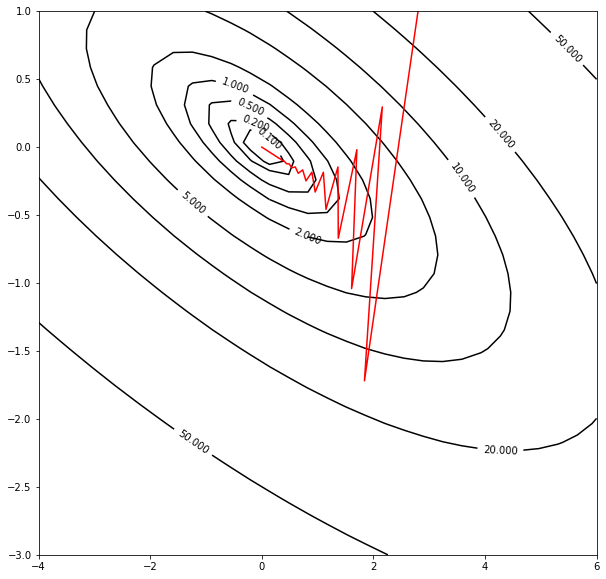

In [10]:
#visualize the data
plot_gradient_descent(grid1, grid2, z, levels, x_y)

We can see that the gradient descent algorithm is taking small steps towards the true minimum, and eventually finds it at (0, 0). While this is only the 2D case, it is easy to visualize how this works in 3D or even higher dimensions.

When looking to use deep learning, it is important to realize that forward and backward propagation are nothing but this same gradient descent algorithm (although a bit more complicated if you are trying to work out the math by yourself).